In [1]:
kk 0

^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^!kk0:起始>^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


In [2]:
%precision 2

'%.2f'

## 矩阵函数(ufunc)

矩阵函数(universal): 以矩阵为自变量的函数, 一般都是由C语言实现的;

In [3]:
x = np.linspace(0, 2*np.pi, 10)
y = np.sin(x,out=x) #out参数可以指定输出数组
x is y

True

比较np.sin()和math.sin()的计算速度:

In [4]:
import math
x = np.array([i * 0.001 for i in range(int(1e6))])

def sin_math(x):
    for i, t in enumerate(x):
        x[i] = math.sin(t)
def sin_numpy(x): np.sin(x, x)
def sin_numpy_loop(x):
    for i, t in enumerate(x):
        x[i] = np.sin(t)

%time sin_math(x) #python内嵌函数只能一个个的计算算
%time sin_numpy(x) #矩阵函数可以一次性计算
%time sin_numpy_loop(x) #使用矩阵函数一个个的计算

Wall time: 309 ms
Wall time: 9.98 ms
Wall time: 1.52 s


np.sin()与math.sin()的数值类型不同

In [5]:
%C type(math.sin(0.5)); type(np.sin(0.5))

type(math.sin(0.5))  type(np.sin(0.5))
-------------------  -----------------
float                numpy.float64    


item()方法: 将某个N维数组元素转化成Python数值

In [6]:
a = np.arange(6.0).reshape(2, 3)
%C 5 a[1,2]; a.item(1, 2);;  type(a[1, 2]); type(a.item(1, 2))

a[1,2]     a.item(1, 2)
------     ------------
5.0        5.0         

type(a[1, 2])     type(a.item(1, 2))
-------------     ------------------
numpy.float64     float             


### 四则运算

numpy中的所有函数都是矩阵函数: 
* `+`: add;
* `-`: subtract, negative;
* `*`: multiply;
* `**`: power;
* `/`: true_divede, 返回精确的商;
* `//`: floor_divede: 商化为整数, 取小;
* `%`: 余数, 或取模运算, remainder,mod;

In [7]:
A = np.arange(6).reshape(2,3)
%C A; A**A; A%2;; \
                    A+A; A-A; A*A; A/2; A//2; -A

     A               A**A              A%2    
-----------  --------------------  -----------
[[0, 1, 2],  [[   1,    1,    4],  [[0, 1, 0],
 [3, 4, 5]]   [  27,  256, 3125]]   [1, 0, 1]]

     A+A            A-A           A*A               A/2             A//2           -A      
--------------  -----------  --------------  -----------------  -----------  --------------
[[ 0,  2,  4],  [[0, 0, 0],  [[ 0,  1,  4],  [[0. , 0.5, 1. ],  [[0, 0, 1],  [[ 0, -1, -2],
 [ 6,  8, 10]]   [0, 0, 0]]   [ 9, 16, 25]]   [1.5, 2. , 2.5]]   [1, 2, 2]]   [-3, -4, -5]]


### 比较运算和布尔运算

**比较运算符:  **
* `==`: equal;
* `!=`: not_equal; 
* `<`: less; 
* `<=`: less_equal;
* `>`: greater; 
* `>=`: greater_equal

In [8]:
np.array([1, 2, 3]) < np.array([3, 2, 1])

array([ True, False, False])

**python中的布尔运算符用关键字`and, or, not`表示, 数组中的布尔运算用`logical_`开头的函数表示:**
* np.logical_and: 与;  
* np.logical_or: 或;  
* np.logical_not: 非;  
* np.logical_xor: 异或;

In [9]:
a = np.arange(5)
b = np.arange(4, -1, -1)
lor = np.logical_or(a == b, a > b)  # 和 a>=b 相同
%C 5 a; a == b;; b; a > b;; ">"*13; lor

       a                              a == b                  
---------------     ------------------------------------------
[0, 1, 2, 3, 4]     array([False, False,  True, False, False])

       b                              a > b                   
---------------     ------------------------------------------
[4, 3, 2, 1, 0]     array([False, False, False,  True,  True])

     ">"*13                            lor                    
---------------     ------------------------------------------
'>>>>>>>>>>>>>'     array([False, False,  True,  True,  True])


In [10]:
%%disabled
# 对两个布尔数组使用 and, or, not 进行布尔运算, 将抛出ValueError异常
a == b and a > b

np.any()和np.all()

In [11]:
%C 5 np.all(a==b); np.any(a==b)

np.all(a==b)     np.any(a==b)
------------     ------------
False            True        


**以bitwise_开头的函数都是位运算函数: **
* np.bitwise_and: 按位与;  
* np.bitwise_or: 按位或;  
* np.bitwise_not: 按位非;  
* np.bitwise_xor: 按位异或;

In [12]:
(a == b) | (a > b)

array([False, False,  True,  True,  True])

In [13]:
~ np.arange(5)

array([-1, -2, -3, -4, -5], dtype=int32)

### 自定义ufunc函数

frompyfunc(): 将普通函数转化成矩阵函数

In [14]:
# `三角波`函数
def triangle_wave(x, c, c_0, h_c):
    """x: 横坐标, c: 三角峰的总峰宽, c_0: 三角峰的前峰宽,  h_c: 三角峰的高度"""
    # 三角波的周期为1，因此只取x坐标的小数部分进行计算
    x = x - int(x) 
    if x >= c: r = 0.0
    elif x < c_0: r = x * h_c/c_0 
    else: r = (c-x)*h_c / (c-c_0)
    return r

In [15]:
triangle_ufunc1 = np.frompyfunc(triangle_wave, 4, 1)
#``4``是输入参数的个数, ``1``是输出值的个数

triangle_ufunc1()所返回值的元素类型是object, 需要将其改为浮点数

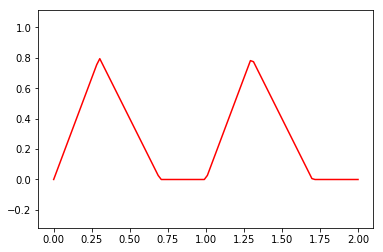

In [16]:
# 测试矩阵函数
x = np.linspace(0,2,100)
y = triangle_ufunc1(x, 0.7, 0.3, .8).astype(np.float)
plt.plot(x,y,'r-')
plt.axis('equal')
plt.show()

列表推导式实现类似于ufunc函数的功能

In [17]:
x = np.linspace(0, 2, 1000)
y1 = np.array([triangle_wave(t, 0.6, 0.4, 1.0) for t in x])

**vectorize()**: 将普通函数转化为矩阵函数, 并且提供调节返回值的类型的关键字参数, otypes

In [18]:
triangle_ufunc2 = np.vectorize(triangle_wave, otypes=[np.float])
y2 = triangle_ufunc2(x, 0.6, 0.4, 1.0)

### 广播

已知矩阵函数func和及其两个参数矩阵(A,B)和一个返回值矩阵(C):
* 正常情况下: A.shape==B.shape==C.shape;
* 如果A.shape!=B.shape, 则需要对A和B进行广播处理:  

广播处理的过程: 

1. **同维处理**(数组的维数必须相同): shape元组的长度必须相同, 长度不足的shape在其前面补1, 可表示成如下形式:  
A.shape=(a1, a2, ..., an);  
B.shape=(b1, b2, ..., bn);  
1. 结果数组的长度: C.shape=(max(a1,b1), max(a2,b2), ..., max(an,bn))
1. 不可广播的条件: 存在`ai!=1 and bi!=1 and ai!=b`;
1. 如果某个轴的长度为1, 而该轴的所需长度大于1时, 该轴所有的元素都由第一个元素复制而来;

#### 使用broadcast_arrays()或broadcast_to()

In [19]:
a = np.arange(0, 60, 10).reshape(-1, 1)
# a = np.arange(0, 60, 10)[:,None]
b = np.arange(0,6)
A, B = np.broadcast_arrays(a,b)
%C a; b; a.shape; b.shape; A; B

  a             b           a.shape  b.shape              A                        B          
------  ------------------  -------  -------  --------------------------  --------------------
[[ 0],  [0, 1, 2, 3, 4, 5]  (6, 1)   (6,)     [[ 0,  0,  0,  0,  0,  0],  [[0, 1, 2, 3, 4, 5],
 [10],                                         [10, 10, 10, 10, 10, 10],   [0, 1, 2, 3, 4, 5],
 [20],                                         [20, 20, 20, 20, 20, 20],   [0, 1, 2, 3, 4, 5],
 [30],                                         [30, 30, 30, 30, 30, 30],   [0, 1, 2, 3, 4, 5],
 [40],                                         [40, 40, 40, 40, 40, 40],   [0, 1, 2, 3, 4, 5],
 [50]]                                         [50, 50, 50, 50, 50, 50]]   [0, 1, 2, 3, 4, 5]]


In [20]:
%%disabled 单独广播a和b
A2 = np.broadcast_to(a,(6,6)) #a是一个二维列向量
B2 = np.broadcast_to(b,(6,6)) #b是一个一维行向量
%C A2; B2

#### 使用None和repeate()

* **a[None,:]**: 将一维行向量变为二维行向量;  
* **[:,None]**: 将一维行向量变为二维列向量; `None`>>1, `:`>>N;

In [21]:
b_None = b[None,:]
%C b_None; b[:,None]; b

       b_None         b[:,None]          b         
--------------------  ---------  ------------------
[[0, 1, 2, 3, 4, 5]]  [[0],      [0, 1, 2, 3, 4, 5]
                       [1],                        
                       [2],                        
                       [3],                        
                       [4],                        
                       [5]]                        


* repeat()方法: 沿着指定的轴复制该轴的第一个元素

In [22]:
A2 = a.repeat(6,axis=1)
B2 = b[None,:].repeat(6,axis=0)
%C A2; B2

            A2                       B2         
--------------------------  --------------------
[[ 0,  0,  0,  0,  0,  0],  [[0, 1, 2, 3, 4, 5],
 [10, 10, 10, 10, 10, 10],   [0, 1, 2, 3, 4, 5],
 [20, 20, 20, 20, 20, 20],   [0, 1, 2, 3, 4, 5],
 [30, 30, 30, 30, 30, 30],   [0, 1, 2, 3, 4, 5],
 [40, 40, 40, 40, 40, 40],   [0, 1, 2, 3, 4, 5],
 [50, 50, 50, 50, 50, 50]]   [0, 1, 2, 3, 4, 5]]


#### 使用ogid[]和mgrid[]对象

* ogrid[]: 将切片转化为**可广播的**二维数组;  
* mgrid[]: 将切片转化为**广播后的**二维数组;

In [23]:
x, y = np.ogrid[:6, :6]
X, Y = np.mgrid[:6, :6]
%C x; y; X; Y

  x             y                     X                     Y          
-----  --------------------  --------------------  --------------------
[[0],  [[0, 1, 2, 3, 4, 5]]  [[0, 0, 0, 0, 0, 0],  [[0, 1, 2, 3, 4, 5],
 [1],                         [1, 1, 1, 1, 1, 1],   [0, 1, 2, 3, 4, 5],
 [2],                         [2, 2, 2, 2, 2, 2],   [0, 1, 2, 3, 4, 5],
 [3],                         [3, 3, 3, 3, 3, 3],   [0, 1, 2, 3, 4, 5],
 [4],                         [4, 4, 4, 4, 4, 4],   [0, 1, 2, 3, 4, 5],
 [5]]                         [5, 5, 5, 5, 5, 5]]   [0, 1, 2, 3, 4, 5]]


ogrid[]或mgrid[]切片下标中虚单位j的含义: j前的数字表示数据点之间的个数, 类似于linspace()的参数

In [24]:
x, y = np.mgrid[0:1:5j, :1:5j]
%C x; y   

               x                                 y                
--------------------------------  --------------------------------
[[0.  , 0.  , 0.  , 0.  , 0.  ],  [[0.  , 0.25, 0.5 , 0.75, 1.  ],
 [0.25, 0.25, 0.25, 0.25, 0.25],   [0.  , 0.25, 0.5 , 0.75, 1.  ],
 [0.5 , 0.5 , 0.5 , 0.5 , 0.5 ],   [0.  , 0.25, 0.5 , 0.75, 1.  ],
 [0.75, 0.75, 0.75, 0.75, 0.75],   [0.  , 0.25, 0.5 , 0.75, 1.  ],
 [1.  , 1.  , 1.  , 1.  , 1.  ]]   [0.  , 0.25, 0.5 , 0.75, 1.  ]]


#### 使用matplotlib扩展画一个三维表面

** 直接在直角坐标系下创建三维离散点: **

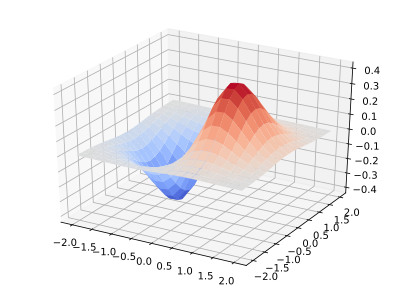

In [25]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')

# 直角坐标系下的离散点
# X, Y = np.mgrid[-2:2:21j, -2:2:21j]
x = np.linspace(-2,2,21)[:,None]
y = np.linspace(-2,2,21)
X, Y = np.broadcast_arrays(x,y)

Z = X * np.exp(-X**2-Y**2)# 需要计算的维

# X,Y,Z都是形状相同的二维数组
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(1, 2, 1, projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap="coolwarm", linewidth=0.2)
plt.show()

** 首先在球坐标下创建三维离散点;  
然后将球坐标离散点转换为直角坐标离散点;  **

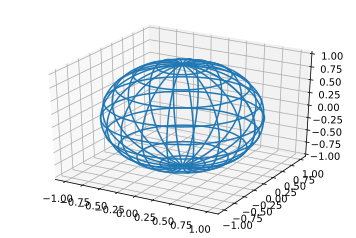

In [26]:
# 创建球坐标系下的离散点
# Theta, Phi = np.mgrid[0:np.pi:100j,0:2*np.pi:200j]
theta = np.linspace(0,np.pi,100)[:,None]
phi = np.linspace(0,2*np.pi,200) # 单轴离散点
Theta, Phi = np.broadcast_arrays(theta, phi) # 双轴离散网格

R = np.full_like(Theta,1)

# 球坐标->直角坐标
X,Y,Z = sph2cart(R,Theta,Phi)

# 直角坐标绘图
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10)
plt.show()

**np.ix_()**: 也可以将一维数组转化成可广播的二维数组

In [27]:
x = range(5)
y = range(6)
x2, y2 = np.ix_(x,y)
%C x; y; x2; y2

     x            y         x2            y2         
-----------  -----------  -----  --------------------
range(0, 5)  range(0, 6)  [[0],  [[0, 1, 2, 3, 4, 5]]
                           [1],                      
                           [2],                      
                           [3],                      
                           [4]]                      


### ufunc的方法

**矩阵函数的特殊方法**: 二目运算符函数所特有的方法;

**reduce()方法**: 将一个二目运算符插入到axis轴的所有元素之间, 然后返回对应轴的结果;

In [28]:
r1 = np.add.reduce([1, 2, 3])  # 1 + 2 + 3
r2 = np.add.reduce([[1, 2, 3], [4, 5, 6]], axis=1)  # (1+2+3),(4+5+6)
%C r1; r2

r1     r2   
--  --------
6   [ 6, 15]


**accumulate()方法**: 和reduce方法类似, 只是返回值的形状和原数组的状相同, 保存所有中间计算结果

In [29]:
a1 = np.add.accumulate([1, 2, 3])
a2 = np.add.accumulate([[1, 2, 3], [4, 5, 6]], axis=1)
%C a1; a2

    a1           a2      
---------  --------------
[1, 3, 6]  [[ 1,  3,  6],
            [ 4,  9, 15]]


** reduceeat()方法**: 对indices序列中的每个元素区间计算一个reduce()值, 返回值的长度与index的长度相同:
1. 将indices分为len(indices)个区间, indices的最后一个元素与a的tail下标形成一个区间;  
1. 如果区间是逆向的, 以区间的左端点为索引返回a中对应的元素(元素之间插入操作符`<op>`, 得到一个计算值);
1. 如果区间是正向的, 以区间的左端点为切片头, 以区间的右端点为切片尾, 返回a中对应元素与`<op>`的计算值);
1. 对于最后一个元素, 以它为切片头, a_tail为切片尾, 返回a中对应元素与`<op>`的计算值;

In [30]:
a = np.array(range(4))
indices=[0, 1, 0, 2, 0, 3, 2]
result = np.add.reduceat(a, indices=indices)
%C 10 a ; indices;; ">"*10; result

     a                       indices       
------------          ---------------------
[0, 1, 2, 3]          [0, 1, 0, 2, 0, 3, 2]

   ">"*10                     result       
------------          ---------------------
'>>>>>>>>>>'          [0, 1, 1, 2, 3, 3, 5]


** np.ufunc.outer(a,b): **
1. `a.shape = a.shape + (1,) * b.ndim`: 将第一个向量维数扩充;
2. `ufunc(a,b)`: 一般使用格式;
3. `a = a.squeeze()`: 将第一个向量的维数还原;

In [31]:
a = np.array([1, 2, 3, 4, 5])
b = np.array([2, 3, 4])
%C 5 a; b; np.multiply.outer(a,b)

       a                b         np.multiply.outer(a,b)
---------------     ---------     ----------------------
[1, 2, 3, 4, 5]     [2, 3, 4]     [[ 2,  3,  4],        
                                   [ 4,  6,  8],        
                                   [ 6,  9, 12],        
                                   [ 8, 12, 16],        
                                   [10, 15, 20]]        


等价操作

In [32]:
a.shape = a.shape + (1,) * b.ndim
%C b.ndim; a.shape; a; b

b.ndim  a.shape    a        b    
------  -------  -----  ---------
1       (5, 1)   [[1],  [2, 3, 4]
                  [2],           
                  [3],           
                  [4],           
                  [5]]           


In [33]:
np.multiply(a,b)

array([[ 2,  3,  4],
       [ 4,  6,  8],
       [ 6,  9, 12],
       [ 8, 12, 16],
       [10, 15, 20]])

In [34]:
# 将a变回原来维数
a.squeeze()

array([1, 2, 3, 4, 5])

In [35]:
kk 2

$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$!kk2:终止>$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
